# OPEN CV

* 영상 처리와 컴퓨터 비전을 위한 오픈소스 라이브러리 
* C, C++, Python 등에서 사용 가능
* 파이썬 버전 2.7과 3.x에 따른 지원에 차이가 없음 
* Numpy 모듈이 파이썬 3.0 ~ 3.3까지의 버전을 지원하지 않아 파이썬 3.4버전 이상이 필요
* 설치 명령어 : 
    - pip install opencv-python / pip3 install opencv-python  
    - pip3 install opencv-contrib-python (엑스트라 모듈 포함) 

# 기본입출력

## 이미지, 비디오 입출력

1. img를 출력해보면 이미지의 화소데이터가 출력된다. 

2. img = cv2.imread(file_name [, mode_flag]) : 파일으로부터 이미지 읽기 
    * file_name : 이미지경로, 문자열 
    * mode_flag = cv2.IMREAD_COLOR : 읽기모드지정
        * cv2.IMREAD_COLOR : **컬러(BGR)스케일**로 읽기, 기본 값 
        * cv2.IMREAD_UNCHANGED : 파일 그대로 읽기 
        * **cv2.IMREAD_GRAYSCALE : 그레이(흑백) 스케일로 읽기** 
        
3. cv2.imshow(title, image) : 특정한 이미지를 화면에 출력
    * title : 윈도우 창의 제목
    * image : 출력할 이미지 객체

4. cv2.waitKey(time)
    * time : 입력 대기 시간 (무한대기 : 0) 
    * 사용자가 어떤키를 입력했을 때 대기하며 입력했을 때 Ascii Code(esc:27) 반환
    * ()의 경우 아무키나 입력해도 창 닫힘

5. cv2.destoryAllWindow() : 화면의 모든 윈도우를 닫는 함수 


### 새창에 이미지 띄우기

### jupyter notebook에 이미지 바로 나타내기

#### 그레이스케일로 읽기

### 이미지 저장하기 

* cv2.imwrite(file_path, img): 이미지를 파일에 저장 
    * file_path : 저장할 파일 경로 이름, 문자열 
    * img : 저장할 영상, Numpy 배열 

경로에 파일로 저장 

### 예제) 
(1) 컬러이미지를 윈도우 이미지로 연다. 

(2) 저장한다. , 아무키나 누르면 닫힌다. 

(3) 흑백사진으로 연댜, 아무키나 누르면 닫힌다.

### 동영상 및 카메라 프레임 읽기
* cap = cv2.VideoCaputure(file_path 또는 index) : 비디오 갭처 객체 생성
    * file_path : 동영상 파일 경로 
    * index : 카메라 장치 번호 (0 부터 차례로 증가)
    * cap : VideoCapture 객체 
* ret = cap.isOpend() : 객체 초기화 확인 
    * ret : 초기화 여부, True/False
* ret, img = cap.read() : 영상 프레임 읽기
    * ret : 프레임 읽기 성송 또는 실패 여부, True / False
    * img : 프레임 이미지, Numpy 배열 또는 None
* cap.set(id, value) : 프로퍼티 변경
* cap.get(id) : 프로퍼티 확인 
* cap.release() : 객체 자원 반납 

### 동영상 파일 읽기
* waitKey(value) : value 값 변경해보기

#### 카메라 프레임 읽기(실습x, 웹캠필요)
* 촬영한 프레임을 읽어 화면에 표시한다.
* 아무 키 입력 시 중지

In [7]:
import cv2

cap = cv2.VideoCapture(0)               # 0번 카메라 장치 연결 ---①
if cap.isOpened():                      # 캡쳐 객체 연결 확인
    while True:
        ret, img = cap.read()           # 다음 프레임 읽기
        if ret:
            cv2.imshow('camera', img)   # 다음 프레임 이미지 표시
            if cv2.waitKey(1) != -1:    # 1ms 동안 키 입력 대기 ---②
                break                   # 아무 키라도 입력이 있으면 중지
        else:
            print('no frame')
            break
else:
    print("can't open camera.")
cap.release()                           # 자원 반납
cv2.destroyAllWindows()

#### 프레임 스트림 프로퍼티 얻기
* cv2.CAP_PROP_FRAME_WIDTH : 프레임 폭
* cv2.CAP_PROP_FRAME_HEIGHT : 프레임 높이
* cv2.CAP_PROP_FPS : 프레임 초당 프레임 수 
* cv2.CAP_PROP_POS_MSEC : 동영상 파일의 프레임 위치(MS)
* cv2.CAP_PROP_POS_AVI_RATIO : 동영상 파일의 상대 위치 (0:시작 , 1:끝)


Created capture: img/big_buck.avi
Frame count: 558
Frame width: 852
Frame height: 480
Frame rate: 24.0
Created capture: 0
Frame count: -1
Frame width: 640
Frame height: 480
Frame rate: 30.0


### 프레임 스트림을 비디오로 저장(실습x_웹캠필요)

In [11]:
import cv2

capture = cv2.VideoCapture(0)
frame_width = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
print('Frame width:', frame_width)
print('Frame height:', frame_height)

video = cv2.VideoWriter('data/captured_video.avi', cv2.VideoWriter_fourcc(*'X264'),
                        25, (frame_width, frame_height))

while True:
    has_frame, frame = capture.read()
    if not has_frame:
        print('Can\'t get frame')
        break
        
    video.write(frame)
        
    cv2.imshow('frame', frame)
    key = cv2.waitKey(3)
    if key == 27:
        print('Pressed Esc')
        break            

capture.release()
video.release()
cv2.destroyAllWindows()

Frame width: 640
Frame height: 480
Pressed Esc


### 비디오 파일의 프레임 간 이동
* cap.set(id, value) : 프로퍼티 변경
* cap.get(id) : 프로퍼티 확인 
* cv2.CAP_PROP_POS_FRAMES : 현재프레임의 개수

Frame count: 558
Position: 0
Position: 100


### 카메라로 사진 찍기 (웹캠필요)
* 카메라 프레임 읽기 
* 아무 키 누르면 'photo.jpg'에 저장

In [13]:
import cv2

cap = cv2.VideoCapture(0)                       # 0번 카메라 연결
if cap.isOpened() :
    while True:
        ret, frame = cap.read()                 # 카메라 프레임 읽기
        if ret:
            cv2.imshow('camera',frame)          # 프레임 화면에 표시
            if cv2.waitKey(1) != -1:            # 아무 키나 누르면
                cv2.imwrite('photo.jpg', frame) # 프레임을 'photo.jpg'에 저장
                break
        else:
            print('no frame!')
            break
else:
    print('no camera!')
cap.release()
cv2.destroyAllWindows()

### 카메라 녹화하기(웹켐필요)
    * 레코드 파일 저장하기
* writer = cv2.VideoWriter(file_path, fourcc, fps, (width, height)) : 비디오 저장 클래스 생성자 함수
    - file_path : 비디오 파일 저장 경로
    - fourcc : 비디오 인코딩 형싱 4글자
    - fps : 초당 프레임 수 
    - (width, height) : 프레임 폭과 프레임 높이 
    - writer : 생성된 비디오 저장 객체 
* writer.writh(frame) : 프레임 저장 
    - frame : 저장할 프레임 
* writer.set(id, value) : 프로퍼티 변경
* writer.get(id) : 프로퍼티 확인 
* ret = writer.fourcc(c1, c2, c3, c4) : fourcc코드 생성
    - c1, c2, c3, c4 : 인코딩 형식
    - ret : fourcc 코드
* cv2.VideoWriter_fourcc(c1, c2, c3, c4) : cv.VideoWriter.fourcc()

In [26]:
import cv2

cap = cv2.VideoCapture(0)    # 0번 카메라 연결
if cap.isOpened:
    file_path = 'record.avi'    # 저장할 파일 경로 이름 ---①
    fps = 30.0                     # FPS, 초당 프레임 수
    fourcc = cv2.VideoWriter_fourcc(*'DIVX') # 인코딩 포맷 문자
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    size = (int(width), int(height))                        # 프레임 크기
    out = cv2.VideoWriter(file_path, fourcc, fps, size) # VideoWriter 객체 생성
    while True:
        ret, frame = cap.read()
        if ret:
            cv2.imshow('camera-recording',frame)
            out.write(frame)                        # 파일 저장
            if cv2.waitKey(int(1000/fps)) != -1: 
                break
        else:
            print("no frame!")
            break
    out.release()                                   # 파일 닫기
else:
    print("can't open camera!")
cap.release()
cv2.destroyAllWindows()

## 그림그리기

### 직선그리기
* cv2.line(img, start, end, color[, thickness, lineType]):
    * img : 그림그릴 대상 이미지, Numpy 배열 
    * start : 선 시작 지점 좌표 (x,y) 
    * end : 선 끝 지점 좌표 (x,y)
    * color : 선 색상 ,(BGR), (0 ~ 255)
    * thickness=1 : 선 두께
    * lineType: 선그리기 형식 
        * cv2.LINE_4,LINE_8, LINE_AA 

#### 간단한 선그려보기

<function matplotlib.pyplot.show(*args, **kw)>

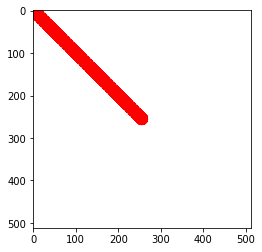

### 사각형 그리기 

* cv2.rectangle(img, start, end, color[, thickness, lineType]: 사각형 그리기 
    * img : 그림 그릴 대상 이미지, NumPy 배열
    * start : d사각형 시작 꼭짓점 (x,y)
    * end : 사각형 끝 꼭짓점( x, y)
    * color : 색상 (BGR)
    * thickness : 선 두께 
        * -1 : 채우기 
    * lineType : 선타입, cv2.line()과 동일 

#### 간단한 사각형 그리기

<function matplotlib.pyplot.show(*args, **kw)>

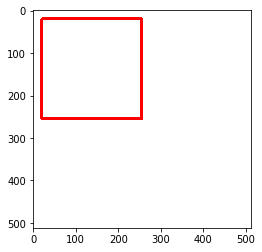

#### 간단한사각형그리기_2

### 다각형 그리기

* cv2.polylines(img, points, isClosed, color[, thickness, lineType]): 다각형 그리기 

    *img : 그림 그릴 대상 이미지 
    * points : 꼭짓점 좌표, Numpy 배열 리스트 
    * isClosed: 닫힌 도형 여부, True/False 
    * color : 색상(BGR)
    * thickness : 선 두께
    * lineType : 선 타입, cv2.line()과 동일

#### 다각형그리기_1

#### 다각형그리기_2

In [21]:
import cv2
import numpy as np                          # 좌표 표현을 위한 numpy 모듈  ---①

img = cv2.imread('img/blank_500.jpg')

# Numpy array로 좌표 생성 ---②
# 번개 모양 선 좌표
pts1 = np.array([[50,50], [150,150], [100,140],[200,240]], dtype=np.int32) 
# 삼각형 좌표
pts2 = np.array([[350,50], [250,200], [450,200]], dtype=np.int32) 
# 삼각형 좌표
pts3 = np.array([[150,300], [50,450], [250,450]], dtype=np.int32) 
# 5각형 좌표
pts4 = np.array([[350,250], [450,350], [400,450], [300,450], [250,350]],dtype=np.int32) 

# 다각형 그리기 ---③
cv2.polylines(img, [pts1], False, (255,0,0))       # 번개 모양 선 그리기
cv2.polylines(img, [pts2], False, (0,0,0), 10)     # 3각형 열린 선 그리기 ---④
cv2.polylines(img, [pts3], True, (0,0,255), 10)    # 3각형 닫힌 도형 그리기 ---⑤
cv2.polylines(img, [pts4], True, (0,0,0))          # 5각형 닫힌 도형 그리기

cv2.imshow('polyline', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 원그리기

* cv2.circle(img, center, radius, color[, thickness, lineType]) : 원 그리기
    * img : 그림 대상 이미지
    * center : 원점 좌표 (x,y)
    * radius : 원의 반지름 
    * color : 색상 (BGR)
    * thickness : 선 두께 (-1 : 채우기)
    * lineType : 선 타입, cv2.line()과 동일

#### 간단한 원 그리기

<function matplotlib.pyplot.show(*args, **kw)>

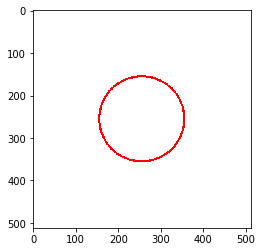

### 텍스트 
* cv2.putText(image, text, position, font_type, font_scale, color) : 하나의 텍스트를 그리는 함수 
     - position : 텍스트가 출력될 위치 
     - font_type : 글씨체 
     - font_scale: 글씨 크기 가중치

### 창관리
* cv2.nameWindow(title [, option]) : 이름을 갖는 창 열기 
    * title : 창이름, 제목 줄에 표시
    * option : 창옵션 
        * cv2.WINDOW_NORMAL:임의의크기, 창 크기 조정 가능 
        * cv2.WINDOW_AUTOSIZE : 이미지와 같은 크기, 창 크기 재조정 불가능 
            
* cv2.moveWindow(title, x좌표 , y좌표) : 창위치 이동 
* cv2.resizeWindow(title, width, height) : 창 크기 변경 
* cv2.destroyWindow(title) : 창 닫기 
* cv2.destroyAllWindows(): 열린 모든 창 닫기

### 사용자의 키보드입력 처리하기
* 윈도우 wasd 키로 상하좌우 움직이기 
* q, esc누르면 종료

* cv2.waitKey(delay) :   
밀리초(0.001초) 단위로 숫자를 전달하면 해당 시간 동안 프로그램을 멈추고 대기하다가 키보드의 눌린 키에 대응하는 코드 값을 정수로 반환
    - 0 : 무한대
    - ex) esc를 누를 경우 27 출력 (ASCII코드 출력)
* ord() : 문자의 아스키코드 출력

### 사용자의 마우스입력 처리하기
* cv2.setMouseCallback(win_name, onMouse [, param]) : win_name에 onMouse 함수를 등록 
    - win_name : 이벤트를 등록할 윈도 이름
    - onMoouse : 이벤트 처리를 위해 미리 선언해 놓은 콜백 함수
    - param : 필요에 따라 onMouse 함수에 ㅓㄴ달할 인자 
* **MouseCallback(event, x, y, flags, param) : 콜백 함수 선언부**
    - event : 마우스 이벤트 종류
        - cv2.EVENT_MOSEMOVE : 마우스 움직임
        - cv2.EVENT_LBUTTONDOWN : 왼쪽 버튼 누름
        - cv2.EVENT_RBUTTONDOWN : 오른쪽 버튼 누름 
        - cv2.EVENT_MBUTTONDOWN : 가운데 버튼 누름
        - cv2.EVENT_LBUTTONDUP : 왼쪽 버튼 뗌
        - cv2.EVENT_RBUTTONUP : 오른쪽 버튼 뗌 
        - cv2.EVENT_MBUTTONUP : 가운데 버튼 뗌
        - cv2.EVENT_LBUTTONDBLCLK: 왼쪽 버튼 더블클릭
        - cv2.EVENT_RBUTTONDBLCLK : 오른쪽 버튼 더블클릭
        - cv2.EVENT_MBUTTONDBLCLK : 가운데 버튼 더블클릭
        - cv2.EVENT_MOUSEWHEEL : 휠 스크롤
        - cv2.EVENT_MOUSEWHEEL : 휠 가로 스크롤 
    - x, y : 마우스 좌표 
    - flags : 마우스 동작과 함께 일어난 상태
        - cv2.EVENT_LBUTTONDOWN(1) : 왼쪽 버튼 누름
        - cv2.EVENT_RBUTTONDOWN(2) : 오른쪽 버튼 누름 
        - cv2.EVENT_MBUTTONDOWN(4) : 가운데 버튼 누름
        - cv2.EVENT_FLAG_CTRLKEY(8) : Ctrl 키 누름
        - cv2.EVENT_FLAG_SHIFTKEY(16) : Shift 키 누름
        - cv2.EVENT_FLAG_ALTKEY(32) : Alt 키 누름
    - param : cv2.setMouseCallback() 함수에서 전달한 인자
        

    

#### 마우스 이벤트로 동그라미그리기

#### 플래그 이용한 동그라미 그리기

#### 콜백함수 이용해서 이미지 자르기 

### 트랙바를 이용한 이미지 색 조정
* cv2.createTrackbar(trackbar_name, win_name, value, count, onChange) : 트랙바 생성
    * trackbar_name : 트랙바 이름 
    * value : 트랙바 초기 값, 0 ~ count 사이의 값 
    * count : 트랙바 눈굼의 개수, 트랙바가 표시할 수 있는 최대 값 
    * onChange : TrackbarCallbak, 트랙바 이벤트 핸들러 함수

* TrackbarCallback(value) : 트랙바 이벤트 콜백 함수 
    * value : 트랙바가 움직인 새 위치 값 

* pos = cv2.getTrackbarPos(trackbar_name, win_name)
    * trackbar_name : 찾고자 하는 트랙바 이름 
    * win_name : 트랙바가 있는 창의 이름 
    * pos : 트랙바 위치 값 